
## **Glossário** <h2>

1. **Introdução** 
    * 1.1 Desafio
    * 1.2 Contexto
    * 1.3 Sobre os dados
    * 1.4 Importação das bibliotecas
    * 1.5 Escolha dos dados
2. **ETL**
    * 2.1 Importação dos dados
    * 2.2 Limpeza e transformação dos dados
3. **Análise**
    * 3.1 Análise de eficiência operacional
    * 3.2 Análise do Ticket Médio
    * 3.3 Análise dos top consumidores
    * 3.4 Análise dos produtos
    * 3.5 Análise de churn
4. **Conclusão**

---

#### **1.1 Desafio**

O desafio foi proposto como parte do processo seletivo da empresa Incidium, referente a vaga de Estágio em Análise de Dados. Para o desafio foi solicitado um relatório com indicadores de performance contextualizados de um conjunto de dados da "Northwind" (empresa fictícia) fornecidos pela própria desafiante.

---

#### **1.2 Contexto**

A Northwind Traders é uma loja fictícia que gerencia pedidos, produtos, clientes, fornecedores e muitos outros aspectos de uma pequena empresa. Hoje a empresa possui cerca de 30 funcionários e um faturamento mensal de 1 milhão e meio de reais. Seus clientes e fornecedores estão distribuídos em diversos países. Seus principais produtos hoje são alimentos, bebidas e utilidades domésticas.

Hoje a Northwind possui relatórios feitos em planilhas feitos de forma sob demanda. Quando a empresa era pequena esse formato funcionava, mas agora com o crescimento acelerado da empresa os dados de diferentes áreas começaram a não bater e as reuniões começaram a ficar mais conflituosas. 
A diretoria quer entender melhor seus dados para aumentar o ticket médio e reduzir o churn, dois objetivos considerados estratégicos no médio prazo.
Além disso, a direção deseja ser mais assertiva e ágil na tomada de decisão com base no acompanhamento do comportamento histórico de seus principais indicadores relacionados à receita e eficiência operacional.

O CEO da Northwind, Tony Stark está convencido que dados são a chave para o crescimento da empresa e agora quer ter uma visão integrada de todos os dados da empresa em um só lugar. No entanto, o gerente de TI da empresa, John Snow, é receoso sobre a dificuldade técnica, custos e prazos para esse projeto, pois John já participou de projetos de BI no passado usando ferramentas de grandes empresas de tecnologia que não tiveram o sucesso esperado. A gerente comercial da empresa, Maria Antonieta, embora muito competente na sua área, não conhece o mundo de dados e de BI e ainda não conseguiu chegar em uma conclusão sobre o projeto. Por outro lado, o recém-contratado Gerente de Inovação da empresa, Pedro Pedreiro, também está apostando alto no projeto para tornar a Northwind uma empresa data driven.

O banco de dados do ERP da empresa é um sistema PostgreSQL em um servidor nuvem. Além disso, a empresa utiliza um CRM da Salesforce e um sistema de contabilidade da ContaAzul. Atualmente a empresa não possui um BI, mas estaria aberta a utilizar ferramentas como Tableau, Data Studio, PowerBI, entre outros.


---

#### **1.3 Sobre os dados**

Os dados foram fornecidos pela Indicium em um link do google drive, correspondem a 14 Tabelas do ERP da Northwind disponível em arquivo northwind.zip.


---

#### **1.4 Importação das bibliotecas** <h3>

#### Bibliotecas utilizadas <h4>
* pandas: Manipulação e limpeza dos dados
* matplotlib e seaborn: Visualizações gráficas
* numpy: Cálculos com os dados

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

#### **1.5 Escolha dos dados**

Após uma análise dos dados fornecidos no arquivo "northwind.zip", optei por trabalhar com as seguintes tabelas: "orders.csv", "order_detail.csv", "customers.csv", "products.csv", "employees.csv", "categories.csv"

#### **Tabelas do Northwind**

**1. orders.csv**
Contém informações sobre os pedidos realizados pelos clientes.
- **order_id**: Identificador único do pedido.  
- **customer_id**: Identificador do cliente que realizou o pedido.  
- **employee_id**: Identificador do funcionário responsável pelo pedido.  
- **order_date**: Data em que o pedido foi feito.  
- **required_date**: Data solicitada para entrega.  
- **shipped_date**: Data em que o pedido foi enviado.  
- **ship_via**: Método de envio do pedido.  
- **freight**: Valor do frete.  
- **ship_name**: Nome do destinatário para envio.  
- **ship_address**: Endereço de entrega.  
- **ship_city**: Cidade de entrega.  
- **ship_region**: Região de entrega (quando aplicável).  
- **ship_postal_code**: CEP de entrega (quando aplicável).  
- **ship_country**: País de entrega.  

**2. order_detail.csv**
Contém os itens detalhados de cada pedido, ou seja, os produtos incluídos em cada order.
- **order_id**: Identificador do pedido (chave estrangeira para `orders`).  
- **product_id**: Identificador do produto (chave estrangeira para `products`).  
- **unit_price**: Preço unitário do produto.  
- **quantity**: Quantidade do produto solicitada no pedido.  
- **discount**: Desconto aplicado (quando existente).  

**3. customers.csv**
Reúne dados cadastrais dos clientes da loja.
- **customer_id**: Identificador único do cliente.  
- **company_name**: Nome da empresa.  
- **contact_name**: Nome do contato (pessoa principal na empresa).  
- **contact_title**: Título do contato (exemplo: Gerente de Compras).  
- **address**: Endereço do cliente.  
- **city**: Cidade do cliente.  
- **region**: Região do cliente (quando aplicável).  
- **postal_code**: CEP do cliente (quando aplicável).  
- **country**: País do cliente.  
- **phone**: Telefone.  
- **fax**: Fax (quando aplicável).  

---

**4. products.csv**
Armazena informações sobre os produtos disponíveis para venda.
- **product_id**: Identificador único do produto.  
- **product_name**: Nome do produto.  
- **supplier_id**: Identificador do fornecedor (chave estrangeira para tabela de fornecedores).  
- **category_id**: Identificador da categoria do produto (chave estrangeira para `categories`).  
- **quantity_per_unit**: Unidade de medida ou embalagem (exemplo: “caixa de 12”).  
- **unit_price**: Preço unitário.  
- **units_in_stock**: Quantidade em estoque.  
- **units_on_order**: Quantidade em pedido (já comprada, mas ainda não chegou).  
- **reorder_level**: Nível de estoque no qual se deve refazer o pedido de compra.  
- **discontinued**: Indica se o produto foi descontinuado (`1` para sim, `0` para não).  

**5. employees.csv**
Traz informações dos funcionários da organização.
- **employee_id**: Identificador único do funcionário.  
- **last_name**: Sobrenome.  
- **first_name**: Primeiro nome.  
- **title**: Cargo (exemplo: Vendedor, Gerente).  
- **title_of_courtesy**: Tratamento de cortesia (exemplo: Sr., Sra.).  
- **birth_date**: Data de nascimento.  
- **hire_date**: Data de contratação.  
- **address**: Endereço residencial do funcionário.  
- **city**: Cidade de residência.  
- **region**: Região de residência (quando aplicável).  
- **postal_code**: CEP (quando aplicável).  
- **country**: País de residência.  
- **home_phone**: Telefone residencial.  
- **extension**: Ramal interno (quando aplicável).  
- **notes**: Observações gerais sobre o funcionário.  
- **reports_to**: ID do gerente para o qual o funcionário se reporta.  
- **photo_path**: Caminho ou link para foto do funcionário (quando aplicável).  

**6. categories.csv**
Lista as categorias em que os produtos estão organizados.
- **category_id**: Identificador único da categoria.  
- **category_name**: Nome da categoria (exemplo: “Bebidas”, “Condimentos”).  
- **description**: Descrição detalhada da categoria (quando disponível).  
- **picture**: Pode conter referência a uma imagem ilustrativa da categoria.  


---

### **2. ETL** <h3>

#### **2.1 Importação dos dados** <h4>

In [135]:
orders = pd.read_csv('data/northwind/orders.csv', sep=';')
order_details = pd.read_csv('data/northwind/order_details.csv', sep=';')
customers = pd.read_csv('data/northwind/customers.csv', sep=';')
products = pd.read_csv('data/northwind/products.csv', sep=';')
employees = pd.read_csv('data/northwind/employees.csv', sep=';')
categories = pd.read_csv('data/northwind/categories.csv', sep=';')

---

#### **2.2 Limpeza e tratamento dos dados** <h4>

Lendo o dataset "orders.csv"

In [136]:
print(f'O dataset orders tem {orders.shape[0]} linhas e {orders.shape[1]} colunas')

orders.head()

O dataset orders tem 830 linhas e 14 colunas


,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [137]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          830 non-null    int64  
 1   customer_id       830 non-null    object 
 2   employee_id       830 non-null    int64  
 3   order_date        830 non-null    object 
 4   required_date     830 non-null    object 
 5   shipped_date      809 non-null    object 
 6   ship_via          830 non-null    int64  
 7   freight           830 non-null    float64
 8   ship_name         830 non-null    object 
 9   ship_address      830 non-null    object 
 10  ship_city         830 non-null    object 
 11  ship_region       323 non-null    object 
 12  ship_postal_code  811 non-null    object 
 13  ship_country      830 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


As colunas 'ship_region', 'ship_postal_code' e 'ship_via' não fazem parte do foco da análise, por isso serão excluídas para deixar os datasets apenas com informações relevantes

In [138]:
orders.drop(columns=['ship_region', 'ship_postal_code', 'ship_via'], axis=1, inplace=True)

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       830 non-null    int64  
 1   customer_id    830 non-null    object 
 2   employee_id    830 non-null    int64  
 3   order_date     830 non-null    object 
 4   required_date  830 non-null    object 
 5   shipped_date   809 non-null    object 
 6   freight        830 non-null    float64
 7   ship_name      830 non-null    object 
 8   ship_address   830 non-null    object 
 9   ship_city      830 non-null    object 
 10  ship_country   830 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.5+ KB


Além disso, as colunas **'order_date'**, **'required_date'** e **'shipped_date'** estão em formato de 'object' o que é **incorreto para datas**. Por isso, utilizaremos a função **"to_datetime"** do pandas para corrigir este erro.

In [139]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['required_date'] = pd.to_datetime(orders['required_date'])
orders['shipped_date'] = pd.to_datetime(orders['shipped_date'])

Foram criadas as colunas *'order_year'* (com o ano do pedido) e *'year_month'* (com o mês e ano do pedido) para poder ser utilizada na análise seguinte.

In [140]:
orders['order_year'] = orders['order_date'].dt.year
orders['year_month'] = orders['order_date'].dt.to_period('M')

orders[['order_year', 'year_month']]

,order_year,year_month
0,1996,1996-07
1,1996,1996-07
2,1996,1996-07
3,1996,1996-07
4,1996,1996-07
...,...,...
825,1998,1998-05
826,1998,1998-05
827,1998,1998-05
828,1998,1998-05


In [141]:
orders.isna().sum()

order_id          0
customer_id       0
employee_id       0
order_date        0
required_date     0
shipped_date     21
freight           0
ship_name         0
ship_address      0
ship_city         0
ship_country      0
order_year        0
year_month        0
dtype: int64

In [142]:
orders.dropna(inplace=True)

Aqui, optei por excluir os registros que possuem valores faltantes para a coluna 'shipped_date', pois esta variável será utilizada durante a análise operacional

In [143]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 821
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       809 non-null    int64         
 1   customer_id    809 non-null    object        
 2   employee_id    809 non-null    int64         
 3   order_date     809 non-null    datetime64[ns]
 4   required_date  809 non-null    datetime64[ns]
 5   shipped_date   809 non-null    datetime64[ns]
 6   freight        809 non-null    float64       
 7   ship_name      809 non-null    object        
 8   ship_address   809 non-null    object        
 9   ship_city      809 non-null    object        
 10  ship_country   809 non-null    object        
 11  order_year     809 non-null    int32         
 12  year_month     809 non-null    period[M]     
dtypes: datetime64[ns](3), float64(1), int32(1), int64(2), object(5), period[M](1)
memory usage: 85.3+ KB


Lendo o dataset "order_details.csv"

In [144]:
print(f'O dataset orders tem {order_details.shape[0]} linhas e {order_details.shape[1]} colunas')

order_details.head()

O dataset orders tem 2155 linhas e 5 colunas


,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [145]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null   int64  
 2   unit_price  2155 non-null   float64
 3   quantity    2155 non-null   int64  
 4   discount    2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


In [146]:
order_details.isna().sum()

order_id      0
product_id    0
unit_price    0
quantity      0
discount      0
dtype: int64

Lendo o dataset "customers.csv"

In [147]:
print(f"O dataset customers tem {customers.shape[0]} linhas e {customers.shape[1]} colunas")

customers.head()

O dataset customers tem 91 linhas e 11 colunas


,customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [148]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    91 non-null     object
 1   company_name   91 non-null     object
 2   contact_name   91 non-null     object
 3   contact_title  91 non-null     object
 4   address        91 non-null     object
 5   city           91 non-null     object
 6   region         31 non-null     object
 7   postal_code    90 non-null     object
 8   country        91 non-null     object
 9   phone          91 non-null     object
 10  fax            69 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


Removendo as colunas 'fax', 'phone', e 'region' do dataset pois não serão utilizadas para construir a tabela final. Além disso, possuem valores faltantes.

In [149]:
customers.drop(columns=['fax', 'phone', 'region'], inplace=True)

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    91 non-null     object
 1   company_name   91 non-null     object
 2   contact_name   91 non-null     object
 3   contact_title  91 non-null     object
 4   address        91 non-null     object
 5   city           91 non-null     object
 6   postal_code    90 non-null     object
 7   country        91 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB


In [150]:
customers['customer_id'].nunique()

91

Lendo o dataset "products.csv"

In [151]:
print(f'O dataset products tem {products.shape[0]} linhas e {products.shape[1]} colunas')

products.head()

O dataset products tem 77 linhas e 10 colunas


,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [152]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         77 non-null     int64  
 1   product_name       77 non-null     object 
 2   supplier_id        77 non-null     int64  
 3   category_id        77 non-null     int64  
 4   quantity_per_unit  77 non-null     object 
 5   unit_price         77 non-null     float64
 6   units_in_stock     77 non-null     int64  
 7   units_on_order     77 non-null     int64  
 8   reorder_level      77 non-null     int64  
 9   discontinued       77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [153]:
products['product_id'].nunique()

77

Lendo o dataset "employees"

In [154]:
print(f'O dataset employees tem {employees.shape[0]} linhas e {employees.shape[1]} colunas')

employees.head()

O dataset employees tem 9 linhas e 18 colunas


,employee_id,last_name,first_name,title,title_of_courtesy,birth_date,hire_date,address,city,region,postal_code,country,home_phone,extension,photo,notes,reports_to,photo_path
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,\x,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,\x,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,\x,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,\x,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [155]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        9 non-null      int64  
 1   last_name          9 non-null      object 
 2   first_name         9 non-null      object 
 3   title              9 non-null      object 
 4   title_of_courtesy  9 non-null      object 
 5   birth_date         9 non-null      object 
 6   hire_date          9 non-null      object 
 7   address            9 non-null      object 
 8   city               9 non-null      object 
 9   region             5 non-null      object 
 10  postal_code        9 non-null      object 
 11  country            9 non-null      object 
 12  home_phone         9 non-null      object 
 13  extension          9 non-null      int64  
 14  photo              9 non-null      object 
 15  notes              9 non-null      object 
 16  reports_to         8 non-null 

In [156]:
employees['employee_id'].nunique()

9

Lendo o dataset "categories.csv"

In [157]:
print(f'O dataset categories.csv tem {categories.shape[0]} linhas e {categories.shape[1]} colunas')
categories.head()

O dataset categories.csv tem 8 linhas e 4 colunas


,category_id,category_name,description,picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",\x
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",\x
2,3,Confections,"Desserts, candies, and sweet breads",\x
3,4,Dairy Products,Cheeses,\x
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",\x


Verificando a presença de valores nulos e valores únicos

In [158]:
categories.nunique()

category_id      8
category_name    8
description      8
picture          1
dtype: int64

In [159]:
categories.isna().sum()

category_id      0
category_name    0
description      0
picture          0
dtype: int64

Fazendo a junção das tabelas para criar o dataframe final que será utilizado durante toda a análise.

In [160]:
df_1 = pd.merge(order_details, orders, on='order_id', how='inner')
df_1 = pd.merge(df_1, products, on='product_id', how='inner')
df_1 = pd.merge(df_1, customers, on='customer_id', how='inner')


print(f'linhas: {df_1.shape[0]} colunas: {df_1.shape[1]}')
df_1.columns

linhas: 2082 colunas: 33


Index(['order_id', 'product_id', 'unit_price_x', 'quantity', 'discount',
       'customer_id', 'employee_id', 'order_date', 'required_date',
       'shipped_date', 'freight', 'ship_name', 'ship_address', 'ship_city',
       'ship_country', 'order_year', 'year_month', 'product_name',
       'supplier_id', 'category_id', 'quantity_per_unit', 'unit_price_y',
       'units_in_stock', 'units_on_order', 'reorder_level', 'discontinued',
       'company_name', 'contact_name', 'contact_title', 'address', 'city',
       'postal_code', 'country'],
      dtype='object')

In [161]:
diff_prices = df_1['unit_price_x'] - df_1['unit_price_y'] 

diff_prices.value_counts()

 0.00     1420
-3.60       41
-2.50       30
-1.55       26
-2.00       23
          ... 
-0.60        2
-2.55        2
-8.00        2
-7.00        1
-19.40       1
Name: count, Length: 63, dtype: int64

Renomeei a coluna 'unit_price_x' para 'unit_price_moment' e a coluna 'unit_price_y' para 'unit_price_historic' já que as colunas possuem diferença nos valores que podem ser fruto de impostos, descontos ou erros e inconsistências nos dados. 

Além disso criei a coluna 'total_item' que representará o total do registro do pedido (quantidade * preço unitário), já que será utilizada na análise.

In [162]:
northwind = (df_1.rename(columns={'unit_price_x':'unit_price_moment', 'unit_price_y': 'unit_price_historic'}))

northwind['total_item'] = northwind['unit_price_moment'] * northwind['quantity'] - (northwind['discount'] * 100)
 
northwind.head()

,order_id,product_id,unit_price_moment,quantity,discount,customer_id,employee_id,order_date,required_date,shipped_date,...,reorder_level,discontinued,company_name,contact_name,contact_title,address,city,postal_code,country,total_item
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,30,0,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France,168.0
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,0,1,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France,98.0
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,0,0,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France,174.0
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,...,0,0,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,44087,Germany,167.4
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,...,10,0,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,44087,Germany,1696.0


In [163]:
northwind.columns

Index(['order_id', 'product_id', 'unit_price_moment', 'quantity', 'discount',
       'customer_id', 'employee_id', 'order_date', 'required_date',
       'shipped_date', 'freight', 'ship_name', 'ship_address', 'ship_city',
       'ship_country', 'order_year', 'year_month', 'product_name',
       'supplier_id', 'category_id', 'quantity_per_unit',
       'unit_price_historic', 'units_in_stock', 'units_on_order',
       'reorder_level', 'discontinued', 'company_name', 'contact_name',
       'contact_title', 'address', 'city', 'postal_code', 'country',
       'total_item'],
      dtype='object')

Exportando o arquivo northwind contendo todas as informações em formato csv

In [207]:
northwind.to_csv("northwind.csv")

---

### **3. Análise** <h3>

#### **3.1 Análise da eficiência operacional**

Um ponto importante na eficiência operacional é a quantidade de pedidos que cada empregado fica encarregado. Para isso irei agrupar os dados por 'employee_id' para saber em média quantos pedidos cada empregado é responsável.

In [204]:
grouped_orders_by_employee = northwind.groupby('employee_id')['order_id'].count().reset_index().rename(columns={'order_id': 'total_orders_made'})

grouped_orders_by_employee.sort_values('total_orders_made', inplace=True, ascending=False)

grouped_orders_by_employee = grouped_orders_by_employee.merge(employees[['employee_id', 'first_name', 'last_name', 'reports_to']], on='employee_id', how='left')

print('-' * 10 + ' ' + 'Total de pedidos por empregado' + ' ' + '-' * 10)
print(grouped_orders_by_employee)
print("")
print("")
print('-' * 10 + ' ' + 'Tabela descritiva do total de pedidos computados por funcionário' + ' ' + '-' * 10)
print(grouped_orders_by_employee['total_orders_made'].describe())

---------- Total de pedidos por empregado ----------
   employee_id  total_orders_made first_name  last_name  reports_to
0            4                409   Margaret    Peacock         2.0
1            3                321      Janet  Leverling         2.0
2            1                314      Nancy    Davolio         2.0
3            8                250      Laura   Callahan         2.0
4            2                232     Andrew     Fuller         NaN
5            7                171     Robert       King         5.0
6            6                164    Michael     Suyama         5.0
7            5                117     Steven   Buchanan         2.0
8            9                104       Anne  Dodsworth         5.0


---------- Tabela descritiva do total de pedidos computados por funcionário ----------
count      9.000000
mean     231.333333
std      102.620661
min      104.000000
25%      164.000000
50%      232.000000
75%      314.000000
max      409.000000
Name: total_orders

In [165]:
diff_quantity_orders_by_employees = grouped_orders_by_employee['total_orders_made'].max() - grouped_orders_by_employee['total_orders_made'].min()

mean_orders_by_employee = grouped_orders_by_employee['total_orders_made'].mean()

employees_under_mean =(
    grouped_orders_by_employee[grouped_orders_by_employee['total_orders_made'] < mean_orders_by_employee].count() / grouped_orders_by_employee['employee_id'].count() * 100
) 

print(f'Os funcionários, em média, ficaram responsáveis por {mean_orders_by_employee:.2f} pedidos, entretanto cerca de {employees_under_mean.values[0]:.2f}% dos funcionários estão abaixo da média de pedidos computados')

Os funcionários, em média, ficaram responsáveis por 231.33 pedidos, entretanto cerca de 44.44% dos funcionários estão abaixo da média de pedidos computados


Esta análise demonstra uma ineficiência operacional que pode acarretar na sobrecarga de alguns funcionários. Portanto, medidas como avaliações de satisfações dos funcionários podem ser adotadas com o intuito de mapear o que está ocorrendo e porque alguns funcionários estão computando mais pedidos do que outros. Além disso, programas de benefícios e comissões podem ser realizados, afim de motivar os funcionários.

Outro ponto importante da eficiência operacional é quantos pedidos atrasam aos nossos clientes, além disso, quanto tempo em média esses pedidos atrasam. Para isso, criarei um dataframe contendo as informações de dia do pedido, data esperada para o cliente e data em que o pedido foi entregue (colunas, respectivamente, 'order_date', 'required_date' e 'shipped_date').

Analisando qual a porcentagem dos nossos pedidos atrasam.

In [166]:
df_dates_orders = northwind[['order_date', 'required_date','shipped_date']].copy()

df_dates_orders['diff_dates'] = (df_dates_orders['shipped_date'] - df_dates_orders['required_date']).dt.days

df_dates_orders['is_late'] = df_dates_orders['diff_dates'] > 0

count_late_orders = df_dates_orders[df_dates_orders['is_late']].count().values[0]

total_orders = df_dates_orders.count().values[0]

pct_late_order = ((count_late_orders / total_orders) * 100).round(2)

print(f'Cerca de {pct_late_order}% dos nossos pedidos atrasam')

Cerca de 4.42% dos nossos pedidos atrasam


Analisando a média de dias que estes pedidos atrasam.

In [167]:
d_late_orders_mean = df_dates_orders[df_dates_orders['is_late']]['diff_dates'].mean()

print(f'Em média, pedidos atrasados demoram {d_late_orders_mean:.0f} dias para chegarem aos consumidores')

Em média, pedidos atrasados demoram 6 dias para chegarem aos consumidores


#### **3.2 Análise do ticket médio e da receita** <h4>

O primeiro ponto a ser analisado será a receita total da empresa durante o período de 07/1996 - 5/1998 (período descrito nos dados)

In [201]:
revenue_per_order = northwind.groupby('order_id')['total_item'].sum()

total_revenue = revenue_per_order.sum()

print(f'Durante o período analisado tivemos uma receita total de ${total_revenue:.2f}.')

Durante o período analisado tivemos uma receita total de $1315324.83.


Nossa receita total foi de

Primeiro, irei verificar como está a distribuição dos valores dos totais dos pedidos

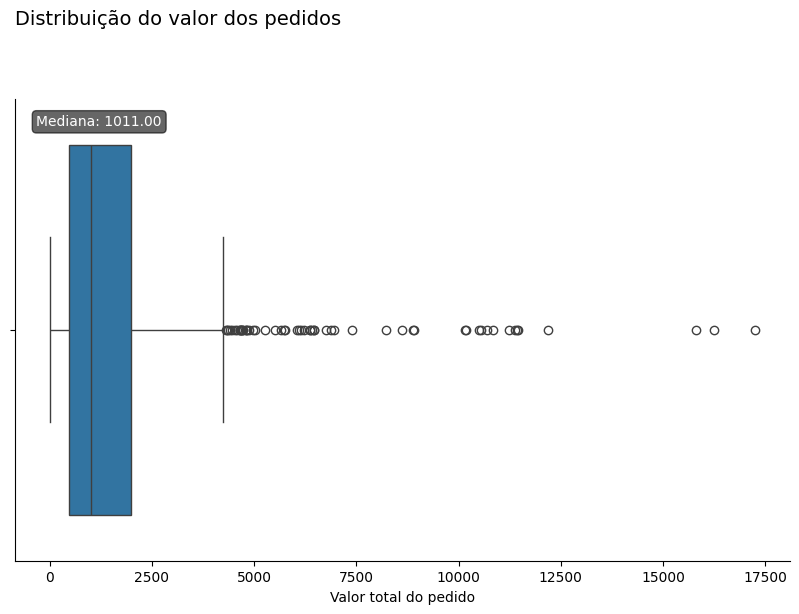

In [194]:
median_value = revenue_per_order.median()

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x=revenue_per_order.values)

ax.set_title('Distribuição do valor dos pedidos\n\n\n', loc='left', fontsize=14)
ax.set_xlabel('Valor total do pedido')
ax.set_ylabel('')

median_val = revenue_per_order.median()

ax.text(
    x=median_val * 1.2,
    y=-0.45, 
    s=f"Mediana: {median_val:.2f}",
    ha='center',        # alinha o texto horizontalmente pelo centro
    va='center',        # alinha verticalmente
    color='white',
    bbox=dict(facecolor='black', alpha=0.6, boxstyle='round')  # caixinha estilizada
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


Observamos a presença de diversos outliers, por isso examinarei um pouco mais a fundo qual a propoção desses pedidos e por quem foram feitos

In [169]:
total_table = (
    northwind.groupby('order_id')
    .agg({'customer_id': 'first','total_item': 'sum'})
    .reset_index()
    .rename(columns={'total_item': 'total_order'})
)

total_table['total_order'].describe()

count      809.000000
mean      1625.865056
std       1996.638198
min         12.500000
25%        479.750000
50%       1011.000000
75%       1994.600000
max      17240.000000
Name: total_order, dtype: float64

Nota-se que a média é cerca de 62% menor do que a mediana, o que acontece devido a presença de outliers

Aqui vemos que o desvio padrão é realmente muito alto, por isso para avaliar a presença de *outliers* utilizarei o método de Tukey. O método consiste em filtrar os dados que sejam maiores do que a soma do Q3 (terceiro quartil dos dados) + 1.5 * IQR (Q3 - Q1) e os dados que sejam menores do que a diferença entre o Q1 (primeiro quartil dos dados) - 1.5 * IQR. Portanto, criei uma coluna chamada 'is_outlier' que receberá "True" ou "False" para caso seja ou não outlier respectivamente.

In [170]:
q1 = total_table['total_order'].quantile(0.25)
q3 = total_table['total_order'].quantile(0.75)
IQR = q3 - q1

total_table['is_outlier'] = (
    (total_table['total_order'] > q3 + IQR * 1.5) | 
    (total_table['total_order'] < q1 - IQR * 1.5)
)

total_table['total_order'] = round(total_table['total_order'], 2)

pivot_outliers = pd.pivot_table(
    data=total_table,
    index='is_outlier',
    values='total_order',
    aggfunc=['count', 'mean']
).reset_index()


pivot_outliers['proportion'] = ((pivot_outliers['count'] / pivot_outliers['count'].sum()) * 100).round(2)

pivot_outliers

,is_outlier,count,mean,proportion
,,total_order,total_order,
0,False,753,1202.013094,93.08
1,True,56,7325.160179,6.92


Com isso, percebemos que cerca de 7.11% dos pedidos representam outliers, totalizando cerca de 59 pedidos. 

Assim, podemos plotar o gráfico novamente para entender como está a distribuição, sem estes pedidos.

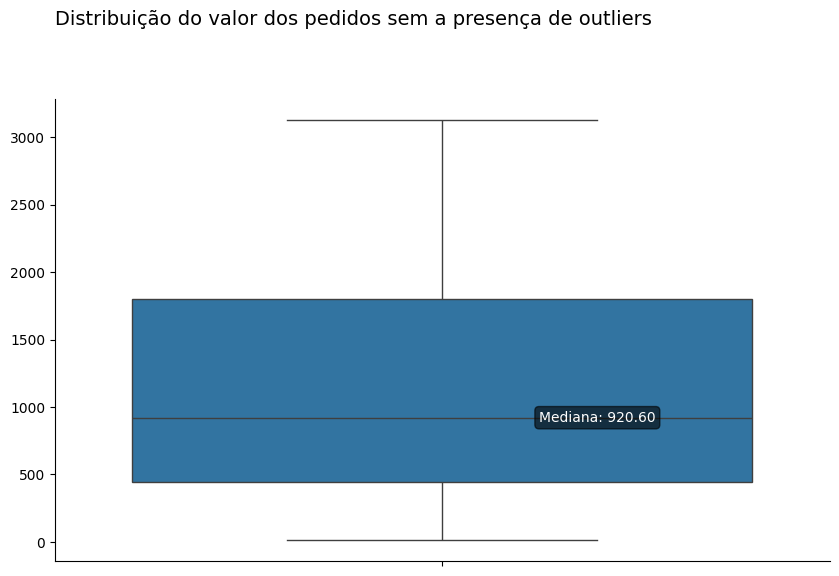

count     753.000000
mean     1202.013094
std       958.568908
min        12.500000
25%       446.600000
50%       920.600000
75%      1799.500000
max      4237.400000
Name: total_order, dtype: float64


In [171]:
non_outliers = total_table[total_table['is_outlier'] == False]

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(
    y=non_outliers['total_order'], 
    whis=1,              
    showfliers=False,    
    ax=ax
)

ax.set_title(
    'Distribuição do valor dos pedidos sem a presença de outliers\n\n\n', 
    loc='left', 
    fontsize=14
)
ax.set_xlabel('')
ax.set_ylabel('')

median_val = non_outliers['total_order'].median()

ax.text(
    x=0.2,
    y=median_val, 
    s=f"Mediana: {median_val:.2f}",
    ha='center',        # alinha o texto horizontalmente pelo centro
    va='center',        # alinha verticalmente
    color='white',
    bbox=dict(facecolor='black', alpha=0.6, boxstyle='round')  # caixinha estilizada
)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

print(non_outliers['total_order'].describe())

Com isso temos um **Ticket Médio** de cerca de **$ 1190.40** 

Outro ponto importante da análise é a receita mensal, para isso, decidi plotar em forma de gráfico a receita total mensal. Além disso, vou observar como o ticket médio se comporta de forma mensal. 

Para definir a receita mensal agrupei os dados em 'year-month' e depois somei o total da receita do mês. Já para definir o ticket médio, utilizei a receita mensal dividida pelo número de pedidos de cada mês e depois tirando a sua média.

In [172]:
monthly_revenue = northwind.groupby('year_month')['total_item'].sum()

monthly_orders = northwind.groupby('year_month')['order_id'].nunique()

monthly_mean_ticket = monthly_revenue / monthly_orders

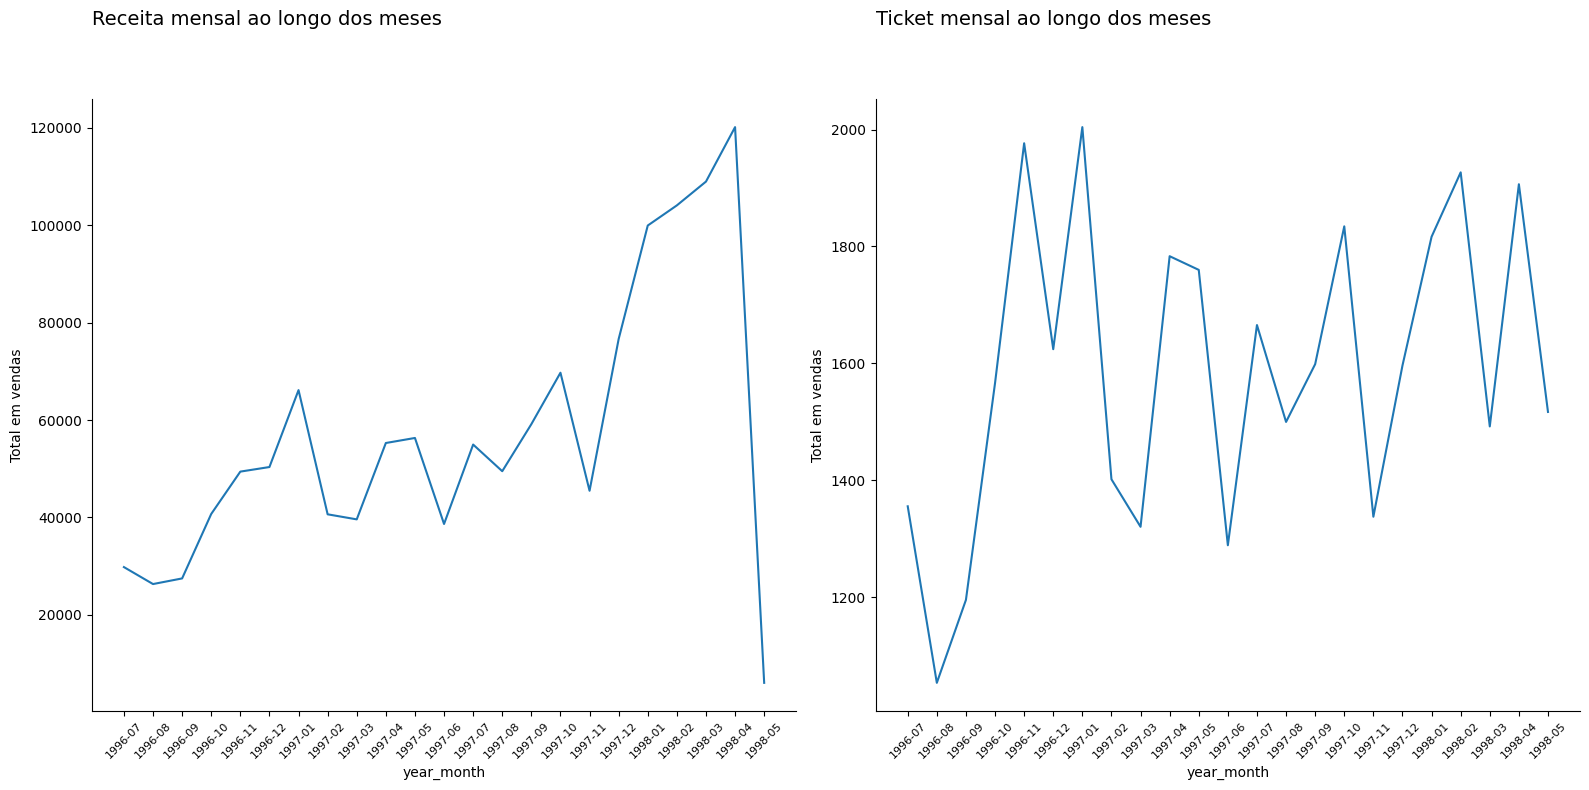

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

ax_1 = sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, ax=axs[0])
ax_1.set_title("Receita mensal ao longo dos meses\n\n\n", loc='left', fontsize=14)
ax_1.set_ylabel("Total em vendas")
ax_1.tick_params(axis='x', rotation=45, labelsize=8)

ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)

ax_2 = sns.lineplot(x=monthly_mean_ticket.index.astype(str), y=monthly_mean_ticket.values, ax=axs[1])
ax_2.set_title("Ticket mensal ao longo dos meses\n\n\n", loc='left', fontsize=14)
ax_2.set_ylabel("Total em vendas")
ax_2.tick_params(axis='x', rotation=45, labelsize=8)

ax_2.spines['top'].set_visible(False)
ax_2.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

Pelo gráfico do ticket médio mensal conseguimos observar que o valor oscila em uma sazonalidade de 3-5 meses, denotando períodos em que possuímos baixas na venda. Uma estratégia importante a ser seguida é identificar estes picos de sazonalidade e investir em campanhas de marketing e promoções.



Analisando o gráfico da receita mensal, percebemos uma grande inclinação a partir de novembro de 1997, o que nos mostra que as vendas em geral cresceram. Além disso, podemos observar que os períodos em que a receita cai são condizentes com os períodos em que o ticket médio mensal também decai. Denotando mais uma vez a existência de picos de sazonalidade

Outro ponto importante a ser analisado é de que no gráfico observamos uma queda drástica para o mês de Maio de 1998. Portanto, ao analisar a média do limite dos dias em que os pedidos são feitos, isto é, qual dia, em média, são feitos os últimos pedidos mês, percebemos que na verdade se trata de um mês com dados não completos (possivelmente, o mês de maio não estava encerrado quando os dados foram coletados).

In [174]:
max_days_orders = northwind.groupby('year_month')['order_date'].max().reset_index()

max_days_orders = max_days_orders['order_date'].dt.day

df_1998_05 = northwind[northwind['year_month'] == '1998-05']

max_stamp_1998_05 = pd.to_datetime(df_1998_05['order_date'].max())

max_day_1998_05 = max_stamp_1998_05.day

count = df_1998_05.groupby('order_id')['order_id'].count().sum()

mean_orders_by_month = northwind.groupby("year_month")["order_id"].count().mean()

print(f'Em média temos {int(mean_orders_by_month)} pedidos por mês e eles são feitos até o dia {int(max_days_orders.mean())}')
print(f'Entretanto, o mês 05 de 1998 possui {count} pedidos e só temos informações até o dia {max_day_1998_05}')


Em média temos 90 pedidos por mês e eles são feitos até o dia 28
Entretanto, o mês 05 de 1998 possui 10 pedidos e só temos informações até o dia 4


---

#### **3.2 Análise dos clientes** <h4>

Agora, analisando quem são os clientes responsáveis por fazer pedidos tão acima do normal, pois são clientes excepcionais e recomenda-se desenvolver estratégias de oferta e promoções para estes clientes.

In [175]:
outlier_clients = (
    total_table.groupby('customer_id')
    .agg({'order_id': 'count', 'total_order': 'mean'})
    .reset_index()
    .rename(columns={'total_order': 'avg_order', 'order_id': 'count_orders'}))

top_10_clients = outlier_clients.sort_values('avg_order', ascending=False).head(10)

mean_orders_clients = total_table.groupby('customer_id')['order_id'].count().mean()

print(f'Média de compras por cliente: {mean_orders_clients:.0f}')

top_10_clients

Média de compras por cliente: 9


,customer_id,count_orders,avg_order
60,QUICK,28,4174.585357
68,SAVEA,31,3700.431935
19,ERNSH,28,3658.220714
35,HUNGO,19,2983.810000
62,RATTC,17,2981.841176
70,SIMOB,6,2948.191667
56,PICCO,10,2609.495000
49,MEREP,13,2462.992308
32,HANAR,14,2420.439286
21,FOLIG,5,2333.380000


Observamos ainda que estes clientes possuem uma frequência de compra acima do normal, já que em média os clientes realizam 9 pedidos mensalmente

Verificando se existem clientes na base "customers" sem pedidos

In [176]:
clientes_totais = set(customers['customer_id'].unique())

clientes_com_pedidos = set(northwind['customer_id'].unique())

clientes_sem_pedido = clientes_totais - clientes_com_pedidos

print(f"Clientes sem pedido: {clientes_sem_pedido}")


Clientes sem pedido: {'PARIS', 'FISSA'}


Analisando quais clientes mais geraram receita para a Northwind

In [206]:
clients_by_revenue = (
    northwind
    .groupby('customer_id')['total_item']
    .sum()
    .reset_index()
    .rename(columns={'total_item': 'total_revenue'})
)

top_10_clients_by_revenue = (
    clients_by_revenue
    .sort_values('total_revenue', ascending=False)
    .head(10)
)

top_10_clients_by_revenue

print(f'Receita total gerada pelos top clientes: $ {top_10_clients['avg_order'].sum():.2f}')

Receita total gerada pelos top clientes: $ 30273.39


C:\Users\raulw\AppData\Local\Temp\ipykernel_11412\2805136872.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=values, y=index, palette=cores)


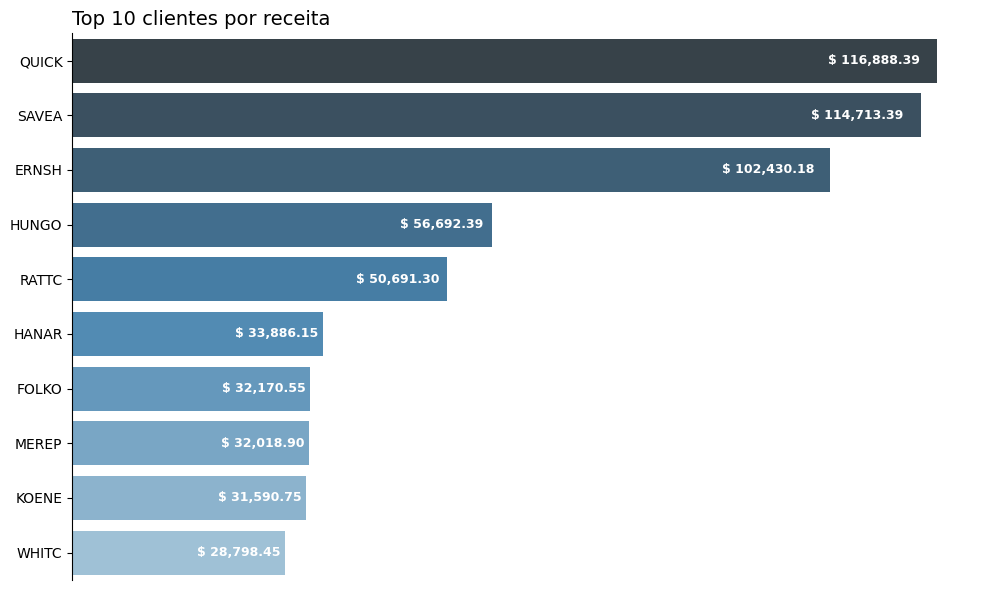

In [178]:
fig, ax = plt.subplots(figsize=(10,6))

# Invertendo a paleta de cores para valores mais altos ficarem mais escuros e mais baixos ficarem mais claros
cores = sns.color_palette("Blues_d", n_colors=10)[::-1]

values = top_10_clients_by_revenue['total_revenue']
index=top_10_clients_by_revenue['customer_id']

ax = sns.barplot(x=values, y=index, palette=cores)

for i, (valor, nome) in enumerate(zip(values, index)):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Top 10 clientes por receita", loc='left', fontsize=14)
ax.set_ylabel("")

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()


Aqui temos os nossos 10 principais clientes por receita. Estes clientes representam conexões valiosas para a empresa, uma vez que são compradores de "alto escalão" e que com estratégias de marketing bem direcionadas podem vir a se tornar mais valiosos ainda.

---

#### **3.3 Análise dos produtos**

Quais os top 5 produtos em receita?

In [179]:
top_products = northwind.groupby('product_name')['total_item'].sum()

top_5_products = top_products.sort_values(ascending=False).head(5).round(2)

top_5_products

product_name
Côte de Blaye              149874.2
Thüringer Rostbratwurst     87531.4
Raclette Courdavault        76041.0
Tarte au sucre              49567.9
Camembert Pierrot           47484.0
Name: total_item, dtype: float64

C:\Users\raulw\AppData\Local\Temp\ipykernel_11412\52181643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_products.values, y=top_5_products.index, palette=cores)


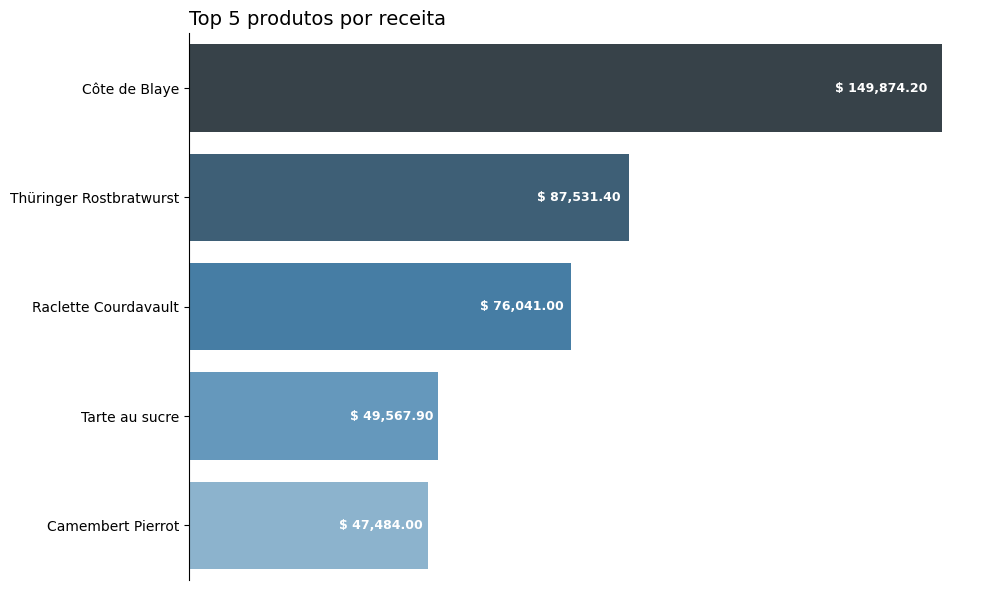

In [180]:
fig, ax = plt.subplots(figsize=(10,6))

# Invertendo a paleta de cores para valores mais altos ficarem mais escuros e mais baixos ficarem mais claros
cores = sns.color_palette("Blues_d", n_colors=10)[::-2]

ax = sns.barplot(x=top_5_products.values, y=top_5_products.index, palette=cores)

for i, (valor, nome) in enumerate(zip(top_5_products.values, top_5_products.index)):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Top 5 produtos por receita", loc='left', fontsize=14)
ax.set_ylabel("")

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()



Aqui percebemos a disparidade entre o primeiro colado e o segundo colado, representando uma diferença de cerca de 71,27%.

Quais são as cinco principais categorias em receita?

In [182]:
top_categories = northwind.groupby('category_id')['total_item'].sum()

top_5_categories = top_categories.sort_values(ascending=False).head(5).round(2).reset_index()

top_5_categories = top_5_categories.merge(categories[['category_name', 'category_id']], on='category_id', how='left')

C:\Users\raulw\AppData\Local\Temp\ipykernel_11412\3689704350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_categories['total_item'], y=top_5_categories['category_name'], palette=cores)


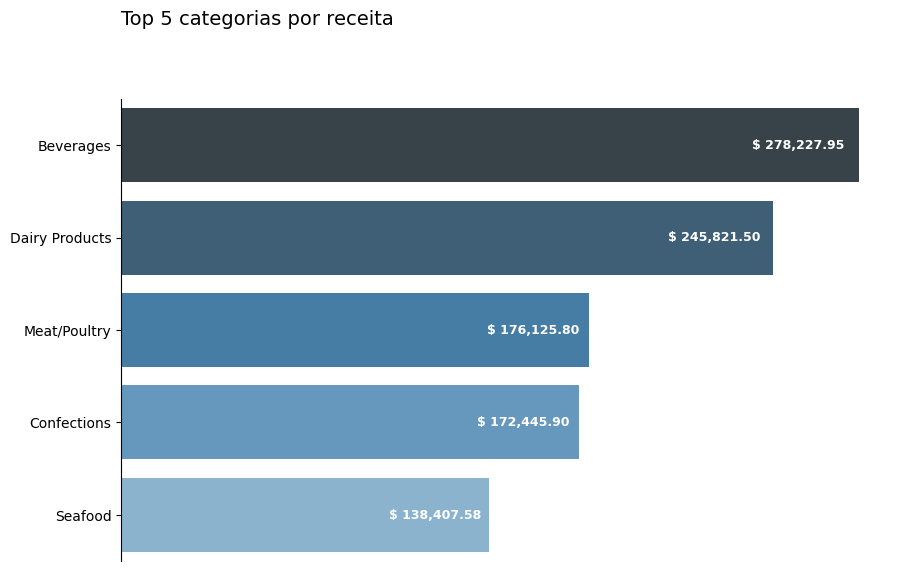

In [187]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x=top_5_categories['total_item'], y=top_5_categories['category_name'], palette=cores)

# Invertendo a paleta de cores para valores mais altos ficarem mais escuros e mais baixos ficarem mais claros
cores = sns.color_palette("Blues_d", n_colors=10)[::-2]

ax.set_title("Top 5 categorias por receita\n\n\n", loc='left', fontsize=14)
ax.set_ylabel("")

for i, (valor, nome) in enumerate(zip(top_5_categories['total_item'], top_5_categories['category_name'])):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_visible(False)

plt.show()

Com isso, percebemos que as categorias **1, 4, 6, 3, 8** representam as categorias de maior receita.

O que nossos principais clientes compram?

In [ ]:
df_top_clients = northwind[northwind['customer_id'].isin(top_10_clients['customer_id'])]

grouped_product_id_per_quantity = df_top_clients.groupby('product_id')['quantity'].sum().reset_index()

grouped_product_id_per_quantity.sort_values('quantity',ascending=False, inplace=True)

top_5_products = grouped_product_id_per_quantity.merge(products[['product_id', 'product_name']], on='product_id', how='left').head(5)



top_5_products

,product_id,quantity,product_name
0,31,647,Gorgonzola Telino
1,60,615,Camembert Pierrot
2,59,610,Raclette Courdavault
3,17,553,Alice Mutton
4,62,514,Tarte au sucre


Com essa informação dos 5 principais produtos comprados, podemos oferecer aos nossos principais clientes estratégias personalizadas combinando produtos e ofertas afim de aumentar o faturamento.

Outro ponto que decidi explorar foi se existe alguma relação entre desconto e quantidade de produtos comprados

In [ ]:
quantity_by_order_id = northwind.groupby("order_id")["quantity"].sum()

quantity_by_order_id

discount_by_order_id = northwind.groupby("order_id")["discount"].mean()

discount_by_order_id

df_quantity_per_discount = pd.DataFrame({'quantity': quantity_by_order_id.values, 'mean_discount': discount_by_order_id})

df_quantity_per_discount

,quantity,mean_discount
order_id,,
10248,27,0.000000
10249,49,0.000000
10250,60,0.100000
10251,41,0.033333
10252,105,0.033333
...,...,...
11063,100,0.066667
11064,173,0.060000
11066,80,0.000000


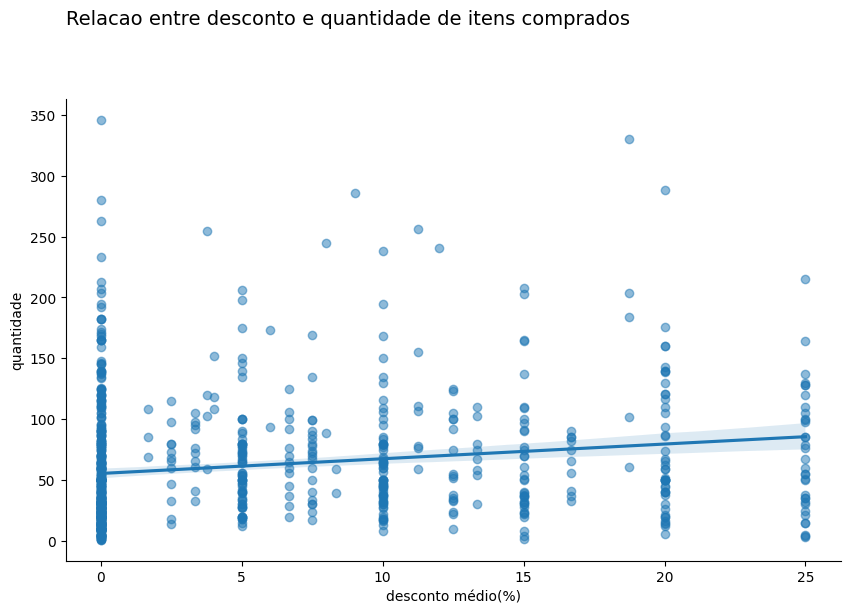

A correlacao entre desconto e quantidade de itens é: 0.18


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=df_quantity_per_discount['mean_discount'] * 100,  
    y=df_quantity_per_discount['quantity'],
    scatter_kws={'alpha': 0.5}
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Relacao entre desconto e quantidade de itens comprados\n\n\n', loc='left', fontsize=14)
ax.set_ylabel('quantidade')
ax.set_xlabel('desconto médio(%)')

plt.show()

corr = (np.corrcoef(df_quantity_per_discount['quantity'], df_quantity_per_discount['mean_discount'])[0][1]).round(2)

print(f'A correlacao entre desconto e quantidade de itens é: {corr}')

Nota-se que não existe uma relação muito forte entre o desconto e a quantidade de itens comprados, ainda mais calculando sua correlação que é de 0.18 (correlação positiva fraca)

---

#### **3.5 Análise de churn**

##### O que é o **churn**?

Churn é a métrica que indica quantos clientes foram perdidos pela empresa após determinado de período de tempo. Para a análise dos clientes que deram churning (evasão), calcularei primeiro quanto, em média, nossos clientes demoram para comprar novamente conosco.

In [ ]:

df_sorted = northwind.sort_values(by=['customer_id', 'order_date'])


df_sorted['diff_buy_date'] = df_sorted.groupby('customer_id')['order_date'].diff().dt.days


avg_days_to_buy_again = df_sorted['diff_buy_date'].mean()

print(f'Nossos clientes demoram em média {round(avg_days_to_buy_again, 0):.0f} dias para comprar novamente conosco')


df_sorted['diff_buy_date'].describe()

Nossos clientes demoram em média 22 dias para comprar novamente conosco


count    1993.000000
mean       21.526342
std        51.660310
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       532.000000
Name: diff_buy_date, dtype: float64

Com esta métrica, irei definir como os clientes presentes no churning rate como os que estão há pelo menos 60 dias sem comprar novamente conosco.

In [ ]:
last_date = northwind['order_date'].max()

last_order_by_customer = northwind.groupby('customer_id')['order_date'].max()

diff_days_since_last_order_per_customer = (last_date - last_order_by_customer).dt.days

churned_customers = diff_days_since_last_order_per_customer[diff_days_since_last_order_per_customer > 60]

churned_customers

customer_id
ANATR     61
ANTON     96
BERGS     61
BLONP    112
CENTC    655
CONSH    101
DUMON     77
FAMIA    185
FOLIG    133
GROSR    137
HUNGC    238
LAMAI     62
LAUGB    123
LAZYK    347
LETSS     81
MEREP    186
RANCH     66
RICAR     84
SEVES     89
SIMOB    126
TRADH    105
TRAIH    116
VICTE    101
VINET    173
Name: order_date, dtype: int64

Além disso, irei verificar qual a porcentagem destes clientes corresponde a tabela por um todo.

In [ ]:
count_churn_customers = churned_customers.nunique()

count_total_customers = northwind['customer_id'].nunique()

pct_churn_clients = (count_churn_customers / count_total_customers * 100)

print(f'Temos uma porcentagem de {pct_churn_clients:.2f}% de clientes que dão churn.')

Temos uma porcentagem de 24.72% de clientes que dão churn.


Para trazermos estes clientes de volta, podemos descobrir o que os clientes que deram churn compravam antes de deixar de comprar conosco.

In [ ]:
df_filtered_by_churn = northwind[northwind['customer_id'].isin(churned_customers.index)]

products_churned_customers = df_filtered_by_churn['product_id'].value_counts().sort_values(ascending=False)

top_10_products_buyed_by_churned_customers = products_churned_customers.head(10)

t_10_p_with_name = top_10_products_buyed_by_churned_customers.reset_index().merge(products[['product_id', 'product_name']], on='product_id', how='left')

t_10_p_with_name

,product_id,count,product_name
0,75,12,Rhönbräu Klosterbier
1,62,11,Tarte au sucre
2,54,11,Tourtière
3,24,10,Guaraná Fantástica
4,52,9,Filo Mix
5,10,9,Ikura
6,41,9,Jack's New England Clam Chowder
7,72,9,Mozzarella di Giovanni
8,11,9,Queso Cabrales
9,68,8,Scottish Longbreads


C:\Users\raulw\AppData\Local\Temp\ipykernel_11412\3002393240.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


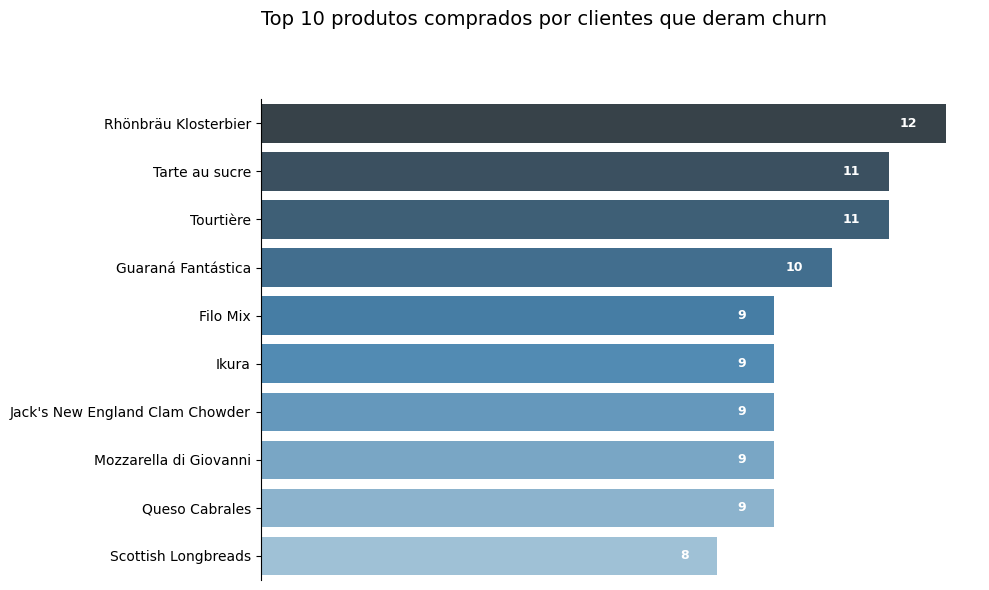

In [189]:
fig, ax = plt.subplots(figsize=(10, 6))


# Paleta invertida
cores = sns.color_palette("Blues_d", n_colors=10)[::-1]

# Gráfico
ax = sns.barplot(
    x=t_10_p_with_name['count'], 
    y=t_10_p_with_name['product_name'], 
    palette=cores
)

for i, valor in enumerate(t_10_p_with_name['count']):
    ax.text(valor - 0.5, i, f"{valor:.0f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Top 10 produtos comprados por clientes que deram churn\n\n\n", loc='left', fontsize=14)
ax.set_ylabel("")
ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()


Uma estratégia interessante para estes clientes que deram churn seria contatá-los com promoções e descontos a respeito dos produtos acima, com a finalidade de trazer de volta estes clientes.

---

### **4. Conclusão**

#### **4.1 Resumo dos principais insights**

* Foi analisada a eficiência operacional da empresa por meio do desempenho dos funcionários e pelas taxas de atraso dos pedidos. Durante a análise foi revelado que cerca de **44%** dos funcionários estão **abaixo da média de desempenho**, um risco enorme para não só a eficiência da equipe e da empresa, mas também para a saúde dos associados da Northwind. Além disso, foi observado uma **taxa de atraso** de **4.44%** dos pedidos feitos a Northwind, e **atrasam, em média, 6 dias**.

* Tivemos **831 pedidos** durante o período analisado na análise.

* Nossa receita total durante o período analisado foi de **1.315.324,20**. Também, tivemos um **ticket médio** de **$ 1.190.40**, com **períodos de sazonalidade** que duram cerca de **3-5 meses** no ticket médio. Além disso, apresentamos um **crescimento exponencial** em entre **novembro de 1997 até o atual momento**.

* Nossos **top clientes** apresentam um **ticket médio** acima de $ 2.000,00, representando contatos valiosos para empresa que devem ser mantidos.

* Nossos **produto** mais **rentável** foi **Côte de Blaye** gerando **$ 149.874,20 de receita** para a Nortwind. E nossa **categoria mais rentável** foi a de **Beverages**. Além disso, nosso **produto mais vendido** foi o **Gorgonzola Telino**

* A taxa de **recidência de compra é de 22 dias**

* A **taxa de churn** observada na análise foi definida com um limite de **60 dias**. Portanto, obtivemos um **churn rate de 24.72%**.


#### **4.2 Principais recomendações**

* Para entender o que está levando os funcionários a terem um **desempenho abaixo da média**, **recomenda-se uma pesquisa de satisfação dos empregados**, com o intuito de entender o que está levando a essa situação. Além disso, os funcionários descritos são **geridos pelo funcionário Steven Buchanan**, o que torna-se necessário uma atenção especial a esta equipe de empregados.

* Direcionar **campanhas VIP** para os **principais clientes** descritos é essencial para manter clientes valiosos.

* Entender o que está causando estes períodos de **sazonalidade**, são essenciais para **aumentar o ticket médio**, por isso **estratégias alinhadas com o setor de marketing** da Northwind devem ser desenvolvidas com a finalidade de mitigar e reduzir os períodos de baixa.

* Investir em campanhas nos **produtos mais vendidos e mais rentáveis** pode ser essencial para **aumentarmos** nosso ticket médio e consequentemente receita.

* Para os clientes que deram **churn** em até **30 dias acima do limite** recomenda-se investir em **promoções personalizadas e anúncios** contendo os **principais produtos comprados** pelos os mesmos.